In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
type(x_train)

numpy.ndarray

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [40]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [41]:
print(x_train[10].shape)

(28, 28)


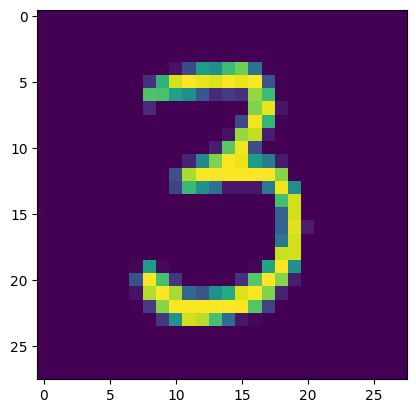

3


In [42]:
plt.imshow(x_train[50])
plt.show()
print(y_train[50])

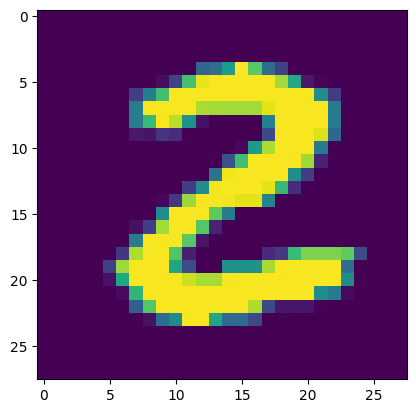

2


In [43]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

In [44]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [45]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [46]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


In [47]:
x_train=x_train/255
x_test=x_test/255

In [48]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [49]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8493 - loss: 0.5075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9568 - loss: 0.1454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9677 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9746 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9781 - loss: 0.0692
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9818 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0486
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9871 - loss: 0.0413
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0370
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9895 - loss: 0.0321


In [52]:
loss,accuracy=model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1421
0.9696999788284302


In [53]:
print(x_test.shape)

(10000, 28, 28)


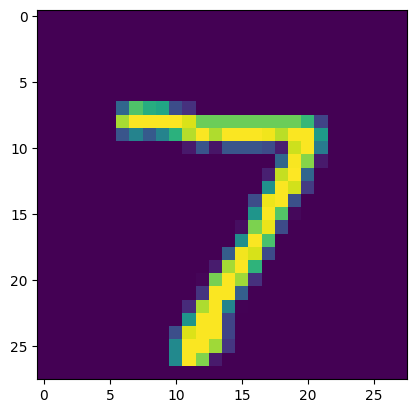

In [54]:
plt.imshow(x_test[0])
plt.show()

In [55]:
print(y_test[0])

7


In [56]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [57]:
print(y_pred[0])

[4.51081258e-04 3.56672262e-03 1.31521195e-01 9.81094360e-01
 1.07344547e-07 1.41317105e-05 1.93251665e-11 9.99927819e-01
 1.22090735e-01 9.35526907e-01]


In [58]:
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [59]:
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [60]:
print(y_pred)

[[4.51081258e-04 3.56672262e-03 1.31521195e-01 ... 9.99927819e-01
  1.22090735e-01 9.35526907e-01]
 [5.67539502e-03 1.71493351e-01 9.99999940e-01 ... 2.17017204e-09
  1.22332675e-02 1.78751486e-10]
 [2.75613391e-04 9.96950567e-01 1.94842108e-02 ... 6.94095045e-02
  9.75184441e-02 9.01877866e-05]
 ...
 [9.55238926e-13 5.69342919e-05 1.24141808e-09 ... 1.30623451e-03
  9.89641121e-05 1.98651280e-04]
 [2.54129758e-04 3.72691546e-03 9.05125398e-06 ... 6.89375446e-09
  3.75619680e-02 5.81310596e-05]
 [3.02788048e-05 2.88960535e-07 1.76172653e-05 ... 1.42254459e-12
  1.58649811e-04 6.09715869e-08]]


In [61]:
con_mat=confusion_matrix(y_test, y_pred_label)
print(con_mat)

tf.Tensor(
[[ 966    0    2    1    0    0    6    0    2    3]
 [   0 1117    2    1    1    1    7    1    5    0]
 [   3    2  998    7    7    0    3    5    7    0]
 [   0    0    5  986    1    1    0    4    7    6]
 [   0    1    5    0  954    0   14    2    4    2]
 [   1    0    0   14    3  855    6    2    9    2]
 [   6    2    2    0    5    7  933    0    3    0]
 [   1    4    7    6    2    0    0  991    8    9]
 [   5    0    6    8    6    2    3    2  937    5]
 [   3    4    0    7   24    1    1    2    7  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

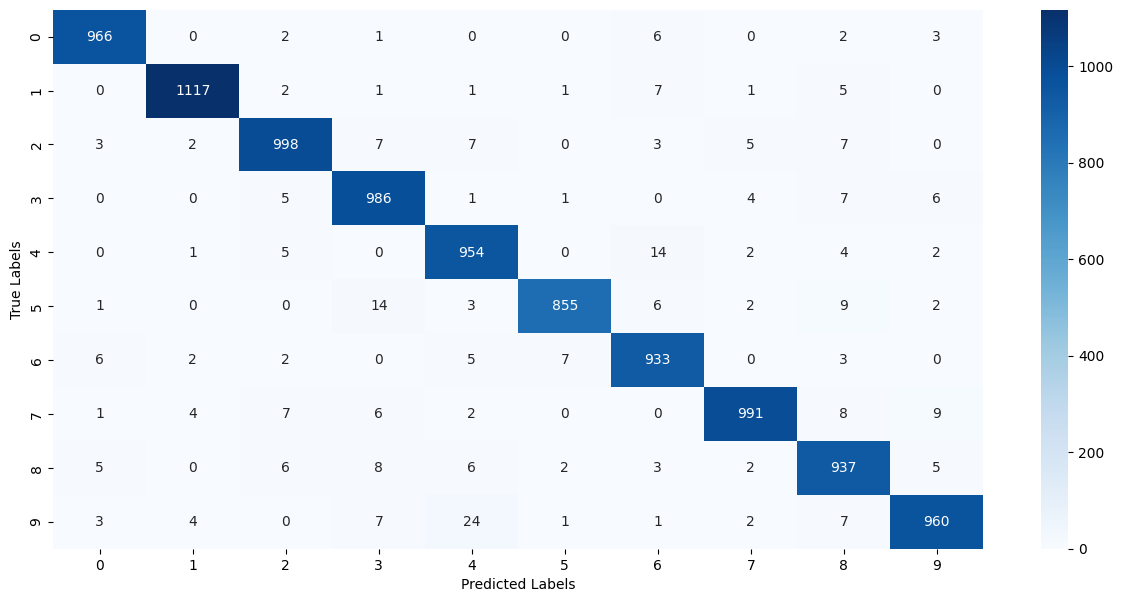

In [62]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [89]:
input_image_path='/content/images (1).png'

In [90]:
input_image = cv2.imread(input_image_path)

In [91]:
type(input_image)

numpy.ndarray

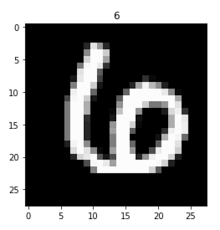

In [92]:
 cv2_imshow(input_image)

In [93]:
input_image.shape

(230, 220, 3)

In [94]:
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [95]:
grayscale.shape

(230, 220)

In [96]:
input_image_resize=cv2.resize(grayscale, (28,28))

In [97]:
input_image_resize.shape

(28, 28)

In [98]:
cv2_imshow(input_image_resize)

In [106]:
input_image_resize=input_image_resize/255

In [107]:
image_reshaped1=np.reshape(input_image_resize, [1,28,28])

In [108]:
input_prediction1=model.predict(image_reshaped1)
print(input_prediction1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.12135512 0.16067444 0.3446216  0.12001815 0.39309943 0.5972112
  0.3482608  0.30439115 0.4961424  0.4115147 ]]


In [109]:
input_pred_label1=np.argmax(input_prediction1)

In [110]:

print(input_pred_label1)

5


Enter the path of the image to be predicted: /content/images (1).png


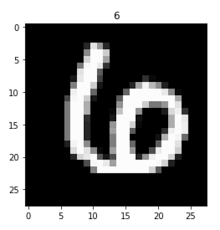

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
7


In [113]:
input_image_path = input("Enter the path of the image to be predicted: ")
input_image = cv2.imread(input_image_path) # Read the image data
cv2_imshow(input_image) # Display the image data
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize / 255
image_reshaped1 = np.reshape(input_image_resize, [1, 28, 28])
input_prediction1 = model.predict(image_reshaped1)
input_pred_label1 = np.argmax(input_prediction1)
print(input_pred_label1)